<a href="https://colab.research.google.com/github/vgangal101/FashionMNIST-DNN/blob/master/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dependencies
!pip install -U tensorflow_datasets
import tensorflow as tf 

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# helper libaries 
import math 
import numpy as np
import matplotlib.pyplot as plt
import logging


     |████████████████████████████████| 3.3MB 3.5MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
# data 
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePG9RDN/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePG9RDN/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


In [25]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("number of training examples: {}".format(num_train_examples))
print("number of test examples: {}".format(num_test_examples))


number of training examples: 60000
number of test examples: 10000


In [31]:
#preprocess

# send pixel value [0,255] to [0,1]
def normalize(images,label):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)



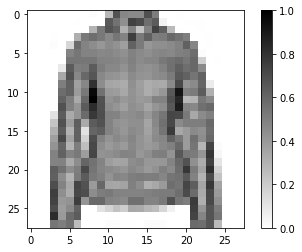

In [7]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

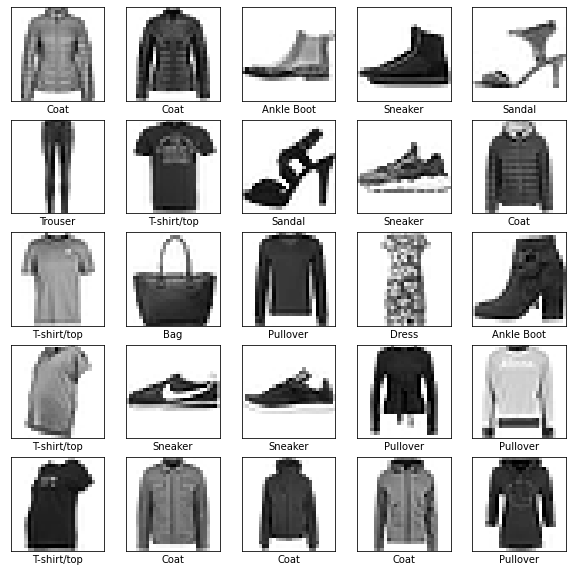

In [8]:
# view the images - a sample

plt.figure(figsize=(10,10))
i = 0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()


In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [33]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])


In [34]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10


In [24]:
# evaluate 

test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:',test_accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8829
Accuracy on test dataset: 0.8828999996185303


In [17]:
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)



In [18]:
predictions.shape

(32, 10)

In [19]:
predictions[0]

array([3.0332946e-04, 5.4742550e-06, 2.8429968e-02, 2.8461298e-05,
       7.7056938e-01, 1.8630771e-14, 2.0015116e-01, 1.5122497e-13,
       5.1227189e-04, 3.2393591e-11], dtype=float32)

In [20]:
np.argmax(predictions[0])


4

In [18]:
test_labels[0]

4

In [22]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

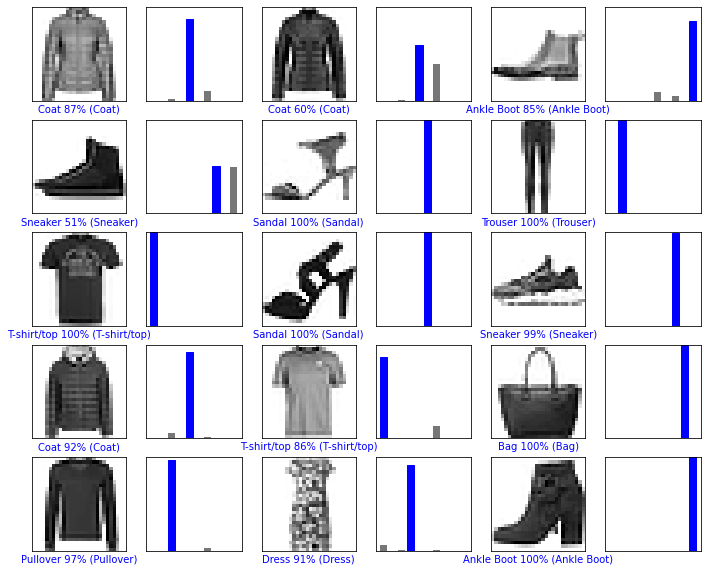

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [24]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [25]:
img = np.array([img])
print(img.shape)


(1, 28, 28, 1)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)


[[4.6477344e-05 1.0023861e-05 1.9393604e-02 1.4927551e-05 8.6957413e-01
  4.8654005e-08 1.1089846e-01 2.6352911e-08 6.2179679e-05 1.1512060e-07]]


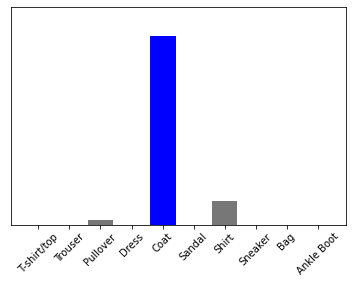

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

4